Training Random Forest
Training Complete!

Accuracy: 0.9605

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3543
           1       0.88      0.84      0.86       584

    accuracy                           0.96      4127
   macro avg       0.93      0.91      0.92      4127
weighted avg       0.96      0.96      0.96      4127



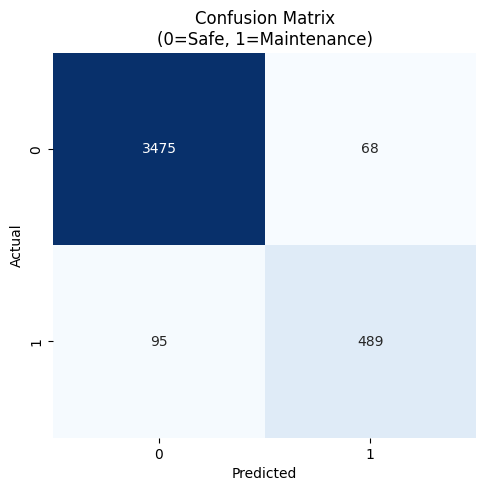

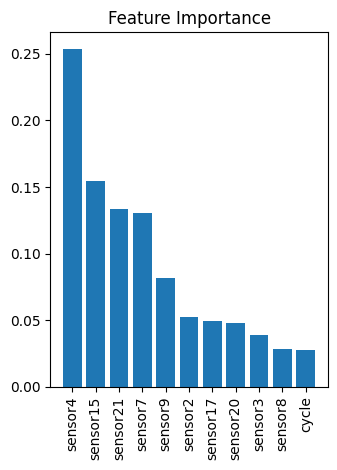

In [4]:
# --- 1. IMPORTS ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- 2. LOAD DATA ---
df = pd.read_csv('train_FD001_prepared.csv')

# --- 3. CLEAN & PREPARE ---
df_clean = df.copy()
# Fix 1: Drop rows with missing values (NaN)
df_clean = df_clean.dropna()
# Fix 2: Replace Infinite values with NaN, then drop them
df_clean = df_clean.replace([np.inf, -np.inf], np.nan).dropna()

# --- 4. DEFINE FEATURES & TARGET ---
# Features: The exact columns from your screenshot
feature_cols = ['cycle', 'sensor2', 'sensor3', 'sensor4', 
                'sensor7', 'sensor8', 'sensor9', 'sensor15', 
                'sensor17', 'sensor20', 'sensor21']

# Target: 1 if RUL <= 30 (Needs Maintenance), 0 if Safe
df_clean['Label'] = df_clean['RUL'].apply(lambda x: 1 if x <= 30 else 0)

X = df_clean[feature_cols]
y = df_clean['Label']

# --- 5. SPLIT DATA ---
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 6. TRAIN MODEL ---
print("Training Random Forest")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("Training Complete!")

# --- 7. EVALUATE ---
y_pred = rf_model.predict(X_test)

print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# --- 8. VISUALIZE RESULTS ---
plt.figure(figsize=(12, 5))

# Plot A: Confusion Matrix (Where did we make mistakes?)
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix\n(0=Safe, 1=Maintenance)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print()
# Plot B: Feature Importance (Which sensor matters most?)
plt.subplot(1, 2, 2)
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [feature_cols[i] for i in indices], rotation=90)
plt.tight_layout()

plt.show()